In [9]:
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt 

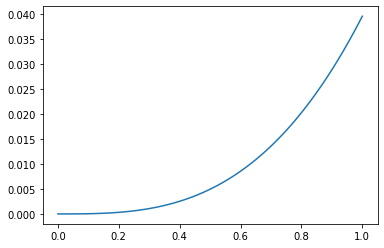

In [14]:
n_points = 100

p_grid = np.linspace(0, 1, n_points)

prior = np.ones(shape=n_points)

likelihood = stats.binom.pmf(3,3,p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()

plt.plot(p_grid, posterior)

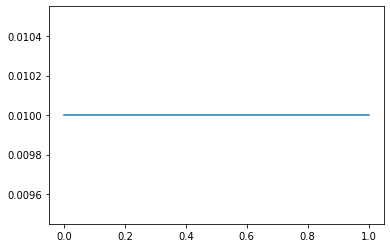

In [15]:
# draws = [1, 1, 1]

n_points = 100

p_grid = np.linspace(0, 1, n_points)

prior = np.ones(shape=n_points)

likelihood = stats.binom.pmf(0,0,p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()

plt.plot(p_grid, posterior)

# for i, draw in enumerate(draws):
#     prior = posterior


In [ ]:
# define grid
p_grid = np.linspace(0, 1, grid_points)

# define prior
prior = prior_func(grid_points)

# compute likelihood at each point in the grid
likelihood = stats.binom.pmf(success, tosses, p_grid)

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
